In [12]:
!pip install gymnasium matplotlib numpy

In [13]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

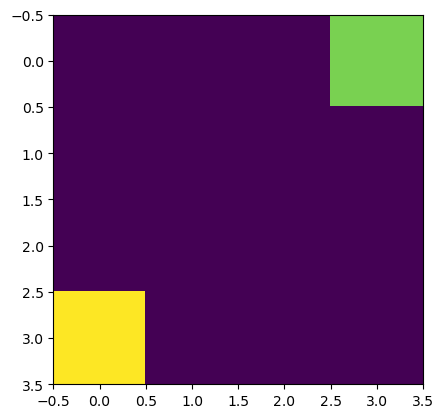

In [14]:
grid = np.zeros((4,4))
pos1 = [3,0]
pos2 = [0,3]
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8
plt.imshow(grid)

In [15]:
class GridEnvironment(gym.Env):
    def __init__(self):
        # self.environment_type = environment_type
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50
        self.timestep = 0
        self.reward = 0
        self.agent_pos = [3,0]
        self.goal_pos = [0,3]
        self.rock_pos1 = [2,3]
        self.rock_pos2 = [3,2]
        self.battery_pos1 = [0,0]
        self.battery_pos2 = [0,2]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.rock_pos1)] = 0.2
        self.state[tuple(self.rock_pos2)] = 0.2
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
    
    def reset(self):
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.rock_pos1)] = 0.2
        self.state[tuple(self.rock_pos2)] = 0.2
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        observation = self.state.flatten()
        info = {}
        return observation, info
    
    def step(self, action):
        if action == 0: # down
            self.agent_pos[0] += 1
        elif action == 1: # up
            self.agent_pos[0] -= 1
        elif action == 2: # right
            self.agent_pos[1] += 1
        elif action == 3: # left
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.rock_pos1)] = 0.2
        self.state[tuple(self.rock_pos2)] = 0.2
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        

        reward = 0
        goal_reached = False

        if np.array_equal(self.agent_pos, self.goal_pos):
            goal_reached=True
            self.reward += 10
            reward += 10

        elif np.array_equal(self.agent_pos, self.rock_pos1):
            self.reward -= 5
            reward -= 5
        elif np.array_equal(self.agent_pos, self.rock_pos2):
            self.reward -= 6
            reward -=6

        elif np.array_equal(self.agent_pos, self.battery_pos1):
            self.reward += 5
            reward += 5
        elif np.array_equal(self.agent_pos, self.battery_pos2):
            self.reward += 6
            reward += 6
        self.timestep += 1
        # terminated = True if self.timestep >= self.max_timesteps else False
        terminated = (self.timestep >= self.max_timesteps) or (goal_reached)
        truncated = True if np.all((self.agent_pos >= 0) & (self.goal_pos) <= 2) else False
        info = {}
        observation = self.state.flatten()
        return observation, reward, terminated, info
    
    def render(self):
        plt.title('Grid Environment')
        plt.imshow(self.state)
        


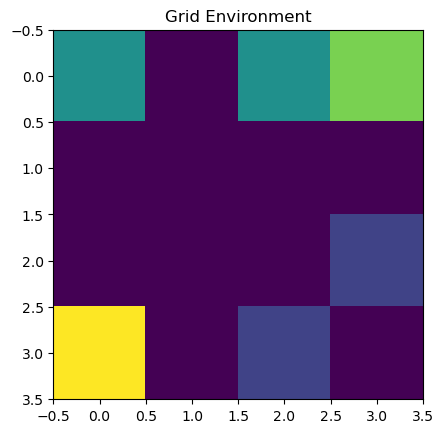

In [16]:
env = GridEnvironment()
terminated, truncated = False, False
observation, info = env.reset()
env.render()

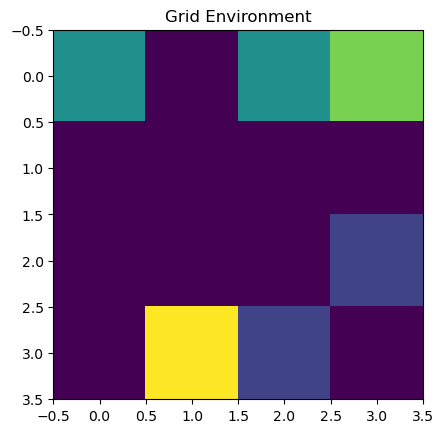

In [17]:
action = 2
observation, reward, terminated, info = env.step(action)
env.render()

In [18]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

Action: 3, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 2, Reward: 0, terminated: False
Action: 1, Reward: 0, terminated: False
Action: 1, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 1, Reward: 5, terminated: False
Action: 3, Reward: 5, terminated: False
Action: 3, Reward: 5, terminated: False
Action: 3, Reward: 5, terminated: False
Action: 2, Reward: 0, terminated: False
Action: 1, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 1, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 2, Reward: 0, terminated: False
Action: 0, Reward: 0, terminated: False
Action: 3, Reward: 0, terminated: False
Action: 2, Reward: 0, terminated: False


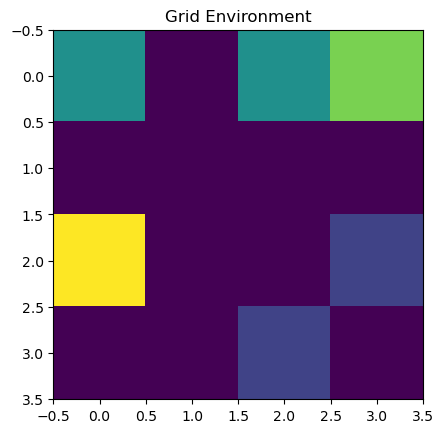

In [19]:
if __name__ == '__main__':
    env = GridEnvironment()
    agent = RandomAgent(env)
    observation, info = env.reset()
    terminated, truncated = False, False
    while not terminated:
        action = agent.step(observation)
        observation, reward, terminated, info = env.step(action)
        print(f'Action: {action}, Reward: {reward}, terminated: {terminated}')
        env.render()

### Part III: DOUBLE Q LEARNING

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.24806662e+00  1.99398735e+01  1.25606097e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.09998927e+01  2.85023029e+02  3.84914988e+01  3.12487145e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.43076245e+00 -4.95000000e-02 -3.909219

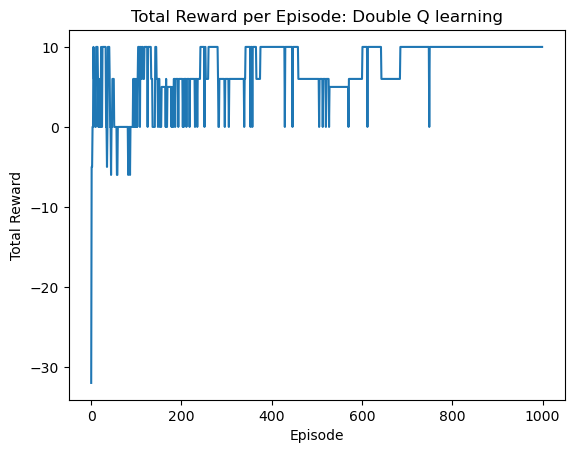

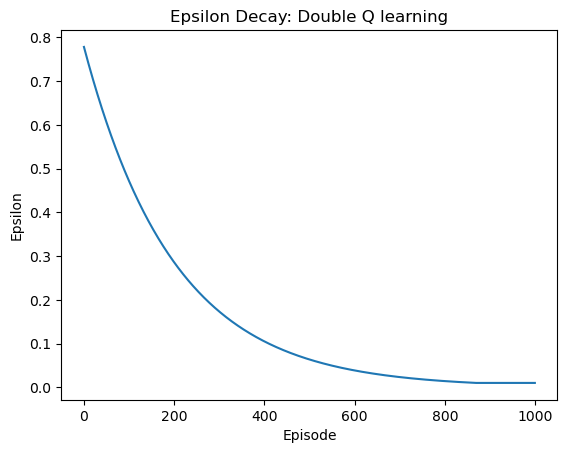

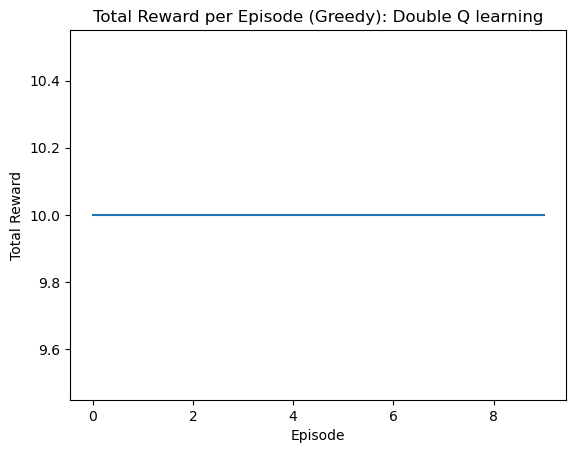

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class DoubleQLearning:
    def __init__(self, observation_space_size, action_space_size, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
        self.q1_table = np.zeros((observation_space_size, action_space_size))
        self.q2_table = np.zeros((observation_space_size, action_space_size))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def select_greedy_action(self, state_index):

        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(env.action_space.n)
        else:
            return np.argmax(self.q1_table[state_index] + self.q2_table[state_index])
        
    def learn(self, state_index, action, reward, next_state_index):
        if np.random.uniform(0, 1) < 0.5:
            next_action = np.argmax(self.q1_table[next_state_index])
            self.q1_table[state_index, action] += self.alpha * ((reward + self.gamma * self.q2_table[next_state_index, next_action]) - self.q1_table[state_index, action])
        else:
            next_action = np.argmax(self.q2_table[next_state_index])
            self.q2_table[state_index, action] += self.alpha * ((reward + self.gamma * self.q1_table[next_state_index, next_action]) - self.q2_table[state_index, action])
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def train(env, agent, episodes, max_timesteps):
    cumulative_rewards = []
    epsilons = []
    for episode in range(episodes):
        state, _ = env.reset()
        state_index = np.argmax(state)
        cumulative_reward = 0
        for t in range(max_timesteps):
            action = agent.select_greedy_action(state_index)
            next_state, reward, terminated, _ = env.step(action) 
            next_state_index = np.argmax(next_state)
            agent.learn(state_index, action, reward, next_state_index)
            cumulative_reward += reward
            state_index = next_state_index
            if terminated:
                break
        cumulative_rewards.append(cumulative_reward)
        epsilons.append(agent.epsilon)
    return cumulative_rewards, epsilons
def state_to_index(state):
    index = np.argmax(state)
    return index
def helper_plot(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

alpha = 0.1
gamma = 0.99
epsilon = 1.0 
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 1000
env = GridEnvironment()
double_q_agent = DoubleQLearning(env.observation_space.n, env.action_space.n, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
max_timesteps = env.max_timesteps
cumulative_rewards, epsilons = train(env, double_q_agent, episodes, max_timesteps)
print("Initial Q-table 1:")
print(np.zeros((env.observation_space.n, env.action_space.n)))
print("Initial Q-table 2:")
print(np.zeros((env.observation_space.n, env.action_space.n)))
print("Trained Q-table 1:")
print(double_q_agent.q1_table)
print("Trained Q-table 2:")
print(double_q_agent.q2_table)
helper_plot(range(episodes), cumulative_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode: Double Q learning')
helper_plot(range(episodes), epsilons, 'Episode', 'Epsilon', 'Epsilon Decay: Double Q learning')

greedy_rewards = []
for episode in range(10):
    state, _ = env.reset()
    cumulative_reward = 0
    state_index = np.argmax(state)
    for timestep in range(max_timesteps):
        action = np.argmax(double_q_agent.q1_table[state_index] + double_q_agent.q2_table[state_index])
        next_state, reward, terminated, _ = env.step(action)
        cumulative_reward += reward
        state_index = np.argmax(next_state)
        if terminated:
            break
    greedy_rewards.append(cumulative_reward)
helper_plot(range(10), greedy_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode (Greedy): Double Q learning')

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[  0.           0.           0.           0.        ]
 [  0.           0.          32.18344547   0.        ]
 [  0.           0.           0.           0.        ]
 [  4.39009596 294.79449951  40.31054514   9.14020471]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.          20.82576102   0.4548231    0.        ]
 [ -1.21517139  33.6978481    0.           0.        ]
 [  0.           0.  

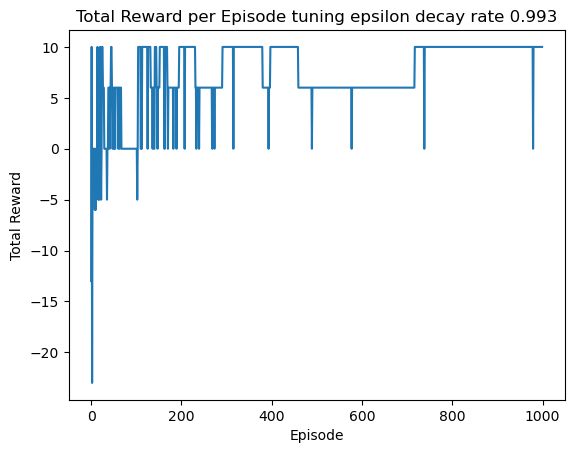

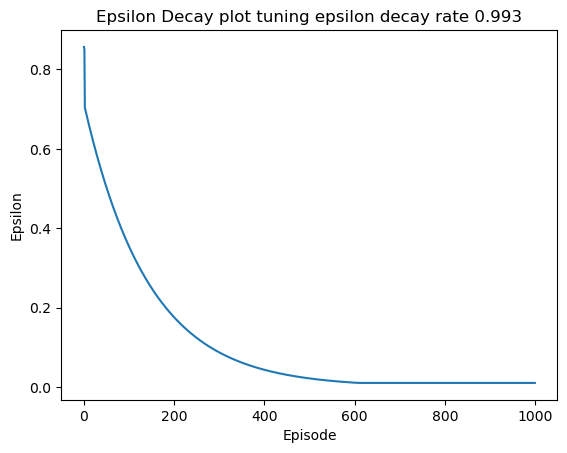

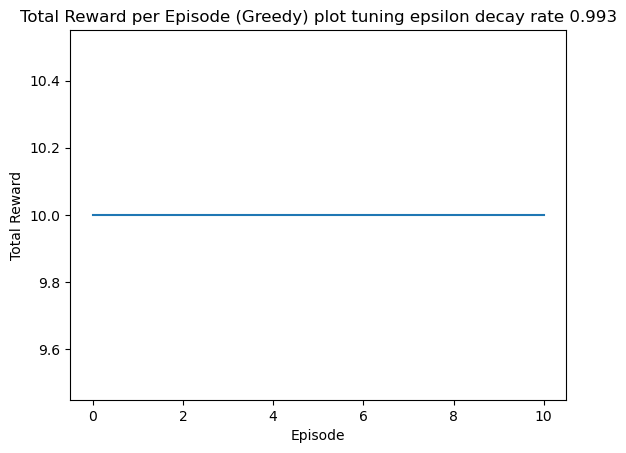

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.86198481 41.44596775 19.00613819 11.06099303]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          2.72059197  0.          0.        ]
 [ 1.08329925 15.96255451  1.2241463   0.        ]
 [ 0.          0.          0.          0.        ]
 [

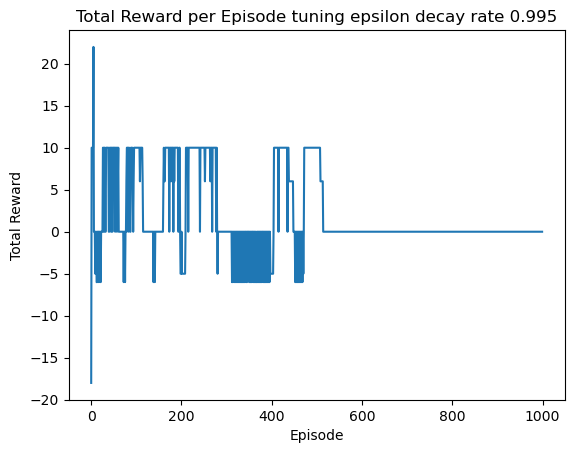

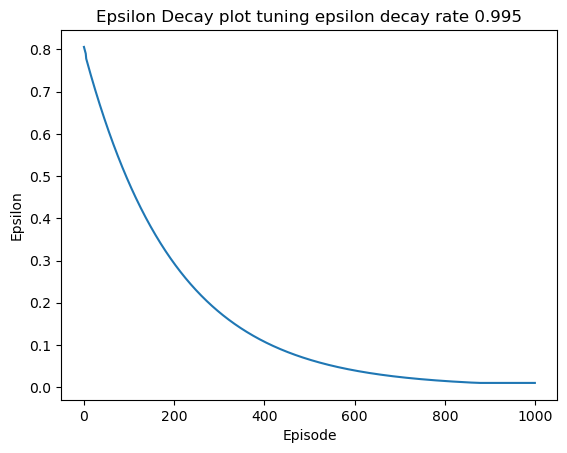

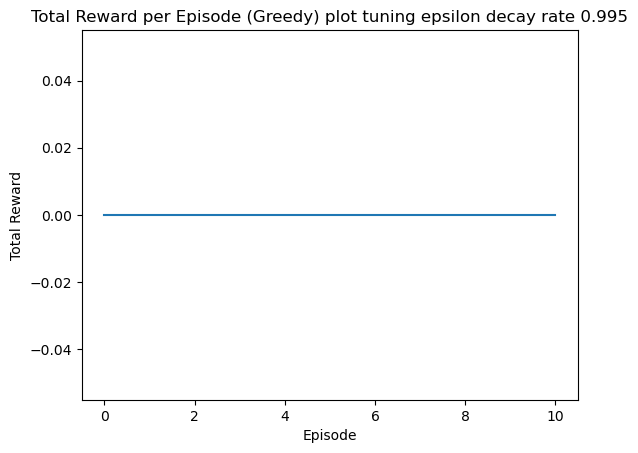

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.70631182e-02  5.57867188e-01  4.05243444e+01  1.44211025e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.32233676e+01  2.44533325e+02  1.42408476e+02  9.71797748e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.65815385e+00  0.00000000e+00]
 [ 0.00000000e+00  3.05056041e+01  1.11369876e+00  0.000000

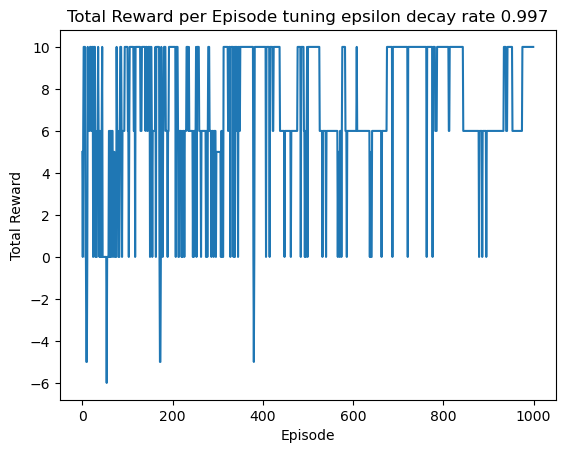

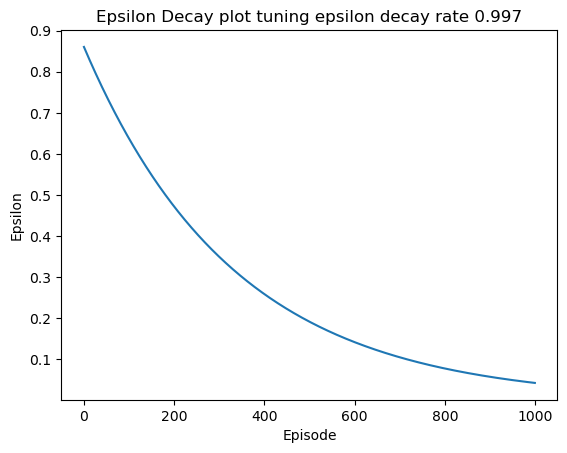

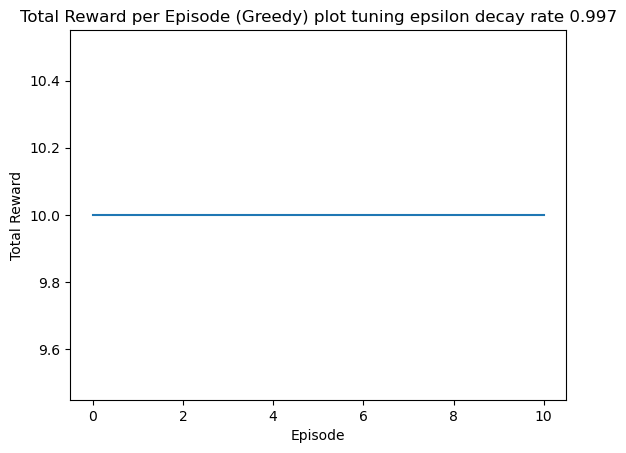

In [21]:
# Hyper parameter tuning
# Tuning epsilon decay rate
epsilon_decay_rates=[0.993,0.995,0.997]
for edr in epsilon_decay_rates:
    alpha = 0.1
    gamma = 0.99
    epsilon = 1.0 
    epsilon_decay = edr
    epsilon_min = 0.01
    episodes = 1000
    env = GridEnvironment()
    double_q_agent = DoubleQLearning(env.observation_space.n, env.action_space.n, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
    max_timesteps = env.max_timesteps
    cumulative_rewards, epsilons = train(env, double_q_agent, episodes, max_timesteps)

    print("Initial Q-table 1:")
    print(np.zeros((env.observation_space.n, env.action_space.n)))
    print("Initial Q-table 2:")
    print(np.zeros((env.observation_space.n, env.action_space.n)))
    print("Trained Q-table 1:")
    print(double_q_agent.q1_table)
    print("Trained Q-table 2:")
    print(double_q_agent.q2_table)
    helper_plot(range(episodes), cumulative_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode tuning epsilon decay rate '+str(edr))
    helper_plot(range(episodes), epsilons, 'Episode', 'Epsilon', 'Epsilon Decay plot tuning epsilon decay rate '+str(edr))

    greedy_rewards = []
    for episode in range(11):
        state, _ = env.reset()
        cumulative_reward = 0
        state_index = np.argmax(state)
        for timestep in range(max_timesteps):
            action = np.argmax(double_q_agent.q1_table[state_index] + double_q_agent.q2_table[state_index])
            next_state, reward, terminated, _ = env.step(action)
            cumulative_reward += reward
            state_index = np.argmax(next_state)
            if terminated:
                break
        greedy_rewards.append(cumulative_reward)
    helper_plot(range(11), greedy_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode (Greedy) plot tuning epsilon decay rate '+str(edr))

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.          0.          0.          0.        ]
 [ 0.          0.08792153  2.13778992  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.55720992 15.64911347 19.99999062  8.25283582]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.08792153  0.          0.        ]
 [ 0.          6.28391495  0.3411842   0.        ]
 [ 0.          8.22982868  0.05        0.04594528]
 [ 0.          0.          0.          0.        ]
 [

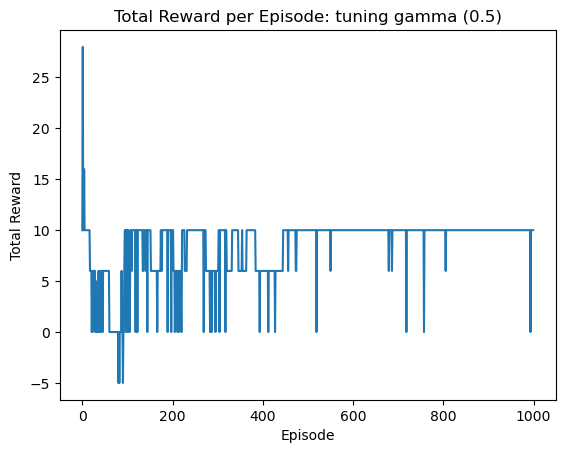

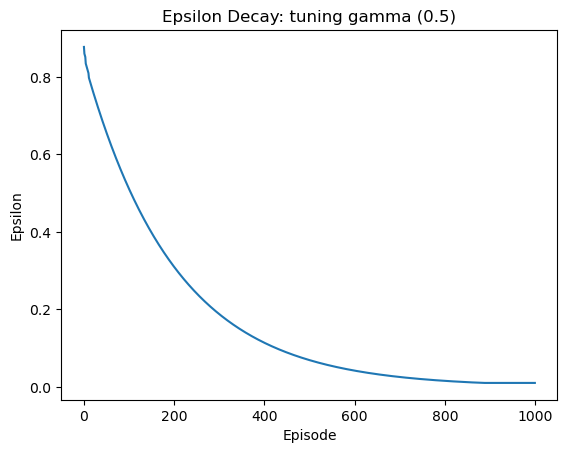

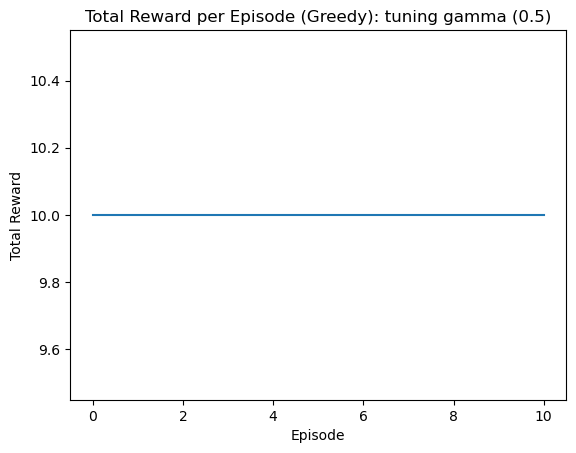

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.642      -0.11382    -0.7695      3.25980646]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.6         0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [

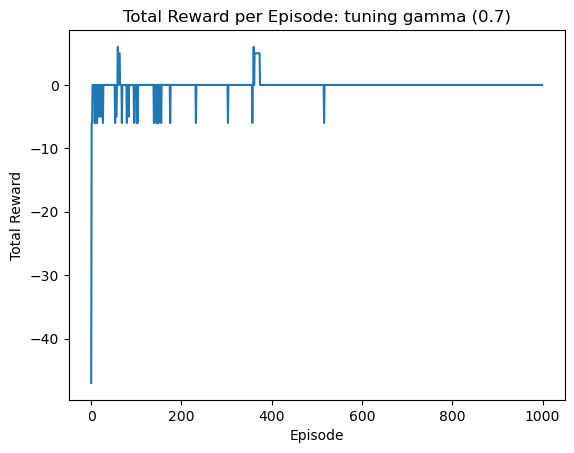

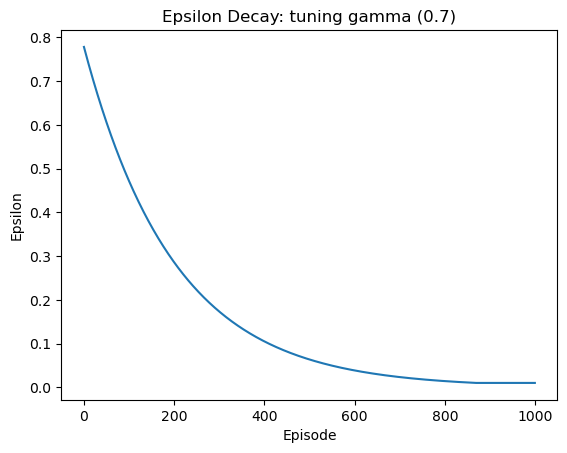

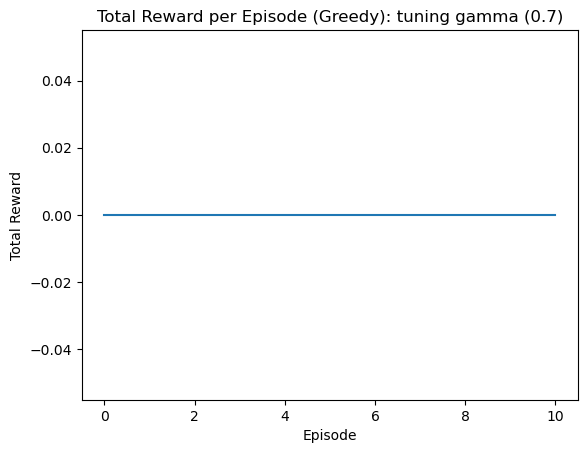

Initial Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Trained Q-table 1:
[[ 0.          0.          0.          0.        ]
 [ 0.          0.         11.1803688   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.41094617 68.41598078 31.99571537 22.31557893]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.21636895 26.39859929  0.14456483  0.        ]
 [ 2.69607654 24.04774928  0.          1.1779821 ]
 [ 0.          0.          0.          0.        ]
 [

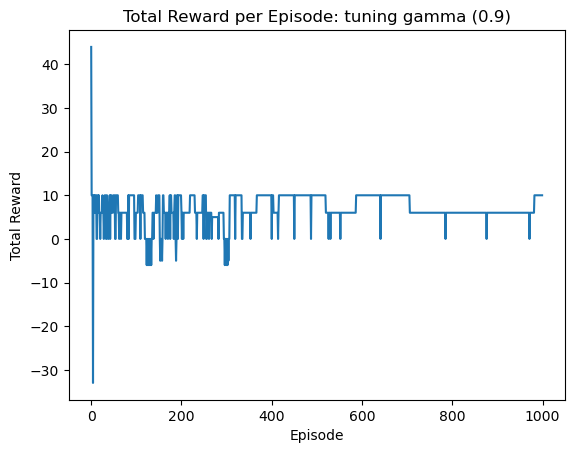

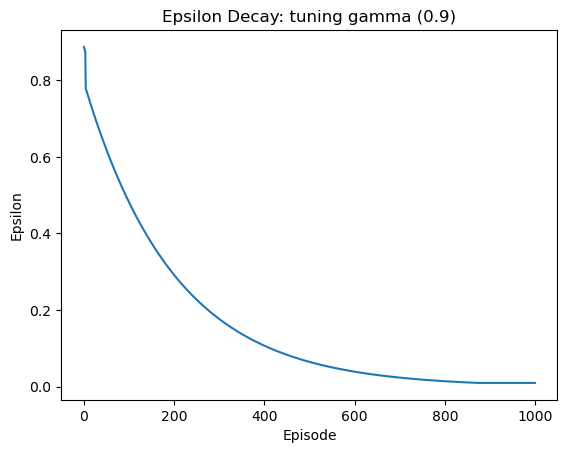

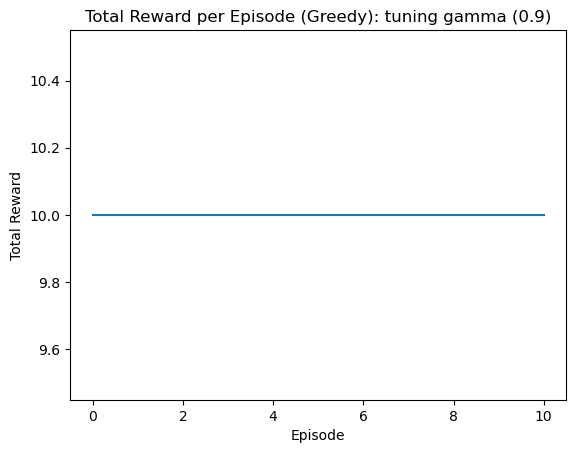

In [22]:
# Tuning Discount factor: gamma
gammas=[0.5,0.7,0.9]
for g in gammas:
    alpha = 0.1
    gamma = g
    epsilon = 1.0 
    epsilon_decay = 0.995
    epsilon_min = 0.01
    episodes = 1000
    env = GridEnvironment()
    double_q_agent = DoubleQLearning(env.observation_space.n, env.action_space.n, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
    max_timesteps = env.max_timesteps
    cumulative_rewards, epsilons = train(env, double_q_agent, episodes, max_timesteps)

    print("Initial Q-table 1:")
    print(np.zeros((env.observation_space.n, env.action_space.n)))
    print("Initial Q-table 2:")
    print(np.zeros((env.observation_space.n, env.action_space.n)))
    print("Trained Q-table 1:")
    print(double_q_agent.q1_table)
    print("Trained Q-table 2:")
    print(double_q_agent.q2_table)
    helper_plot(range(episodes), cumulative_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode: tuning gamma ('+str(g)+')')
    helper_plot(range(episodes), epsilons, 'Episode', 'Epsilon', 'Epsilon Decay: tuning gamma ('+str(g)+')')
    
    greedy_rewards = []
    for episode in range(11):
        state, _ = env.reset()
        cumulative_reward = 0
        state_index = np.argmax(state)
        for timestep in range(max_timesteps):
            action = np.argmax(double_q_agent.q1_table[state_index] + double_q_agent.q2_table[state_index])
            next_state, reward, terminated, _ = env.step(action)
            cumulative_reward += reward
            state_index = np.argmax(next_state)
            if terminated:
                break
        greedy_rewards.append(cumulative_reward)
    helper_plot(range(11), greedy_rewards, 'Episode', 'Total Reward', 'Total Reward per Episode (Greedy): tuning gamma ('+str(g)+')')
